# K-Means and Agglomerative Clustering

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
# read dataset
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# drop unnecessary columns
data = data.drop(['CustomerID'], axis=1)    
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [14]:
# label encoding on categorical column Gender
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["Genre"] = label.fit_transform(data["Genre"])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [16]:
data_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [17]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_scaled)

data['KMeans_Cluster'] = kmeans.labels_
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,1,19,15,39,4
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,1


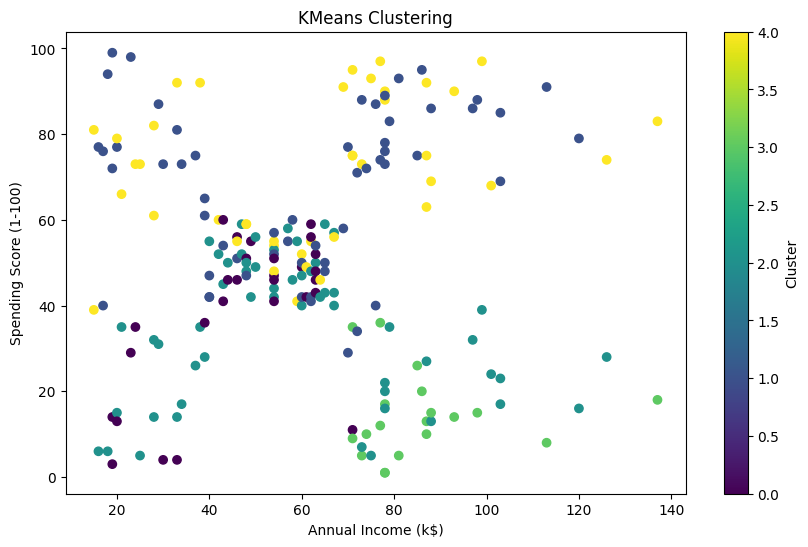

In [18]:
# plotting KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

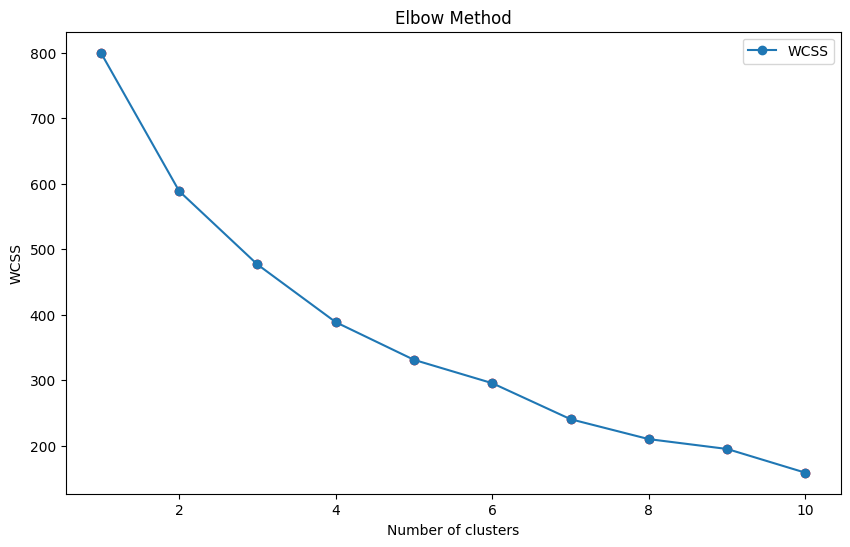

In [20]:
# using WCSS to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.scatter(range(1, 11), wcss, color='red')  # Add dots at each cluster
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

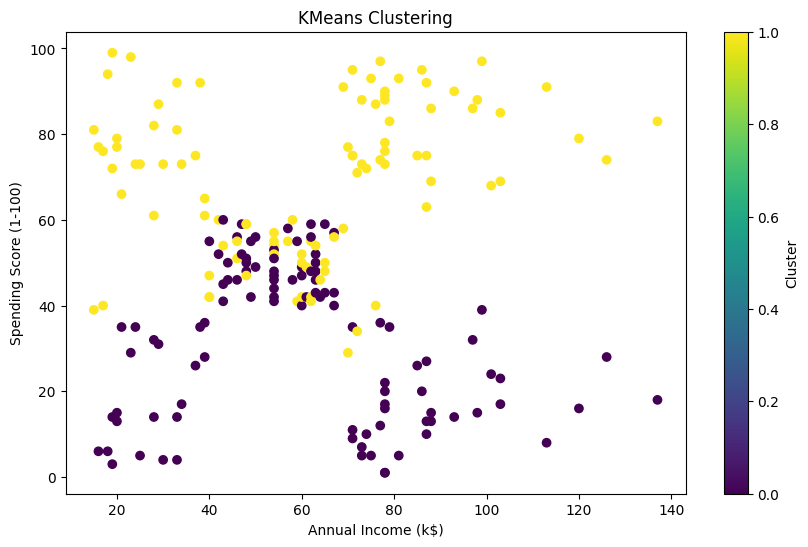

In [21]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_scaled)

data['KMeans_Cluster'] = kmeans.labels_
data.head()

# plotting KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

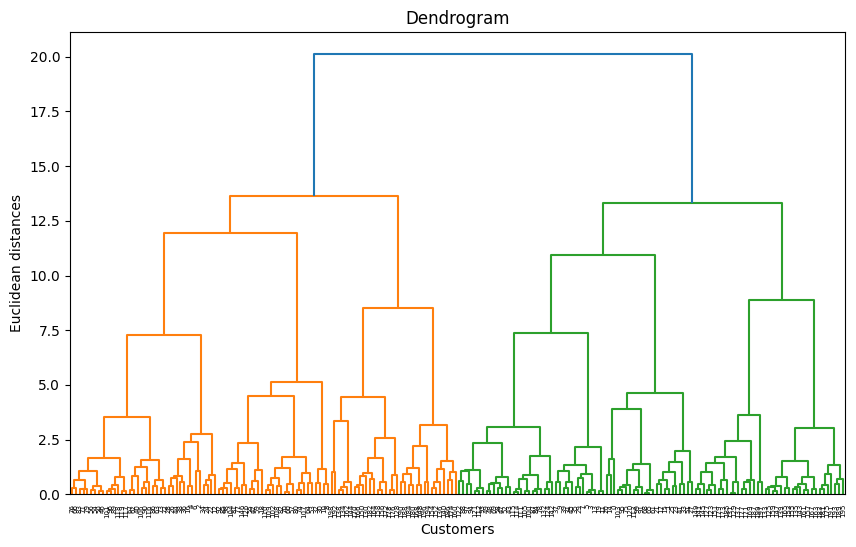

In [25]:
# Agglomerative clustering
 
link = linkage(data_scaled, method='ward')
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 6))
dendrogram(link, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


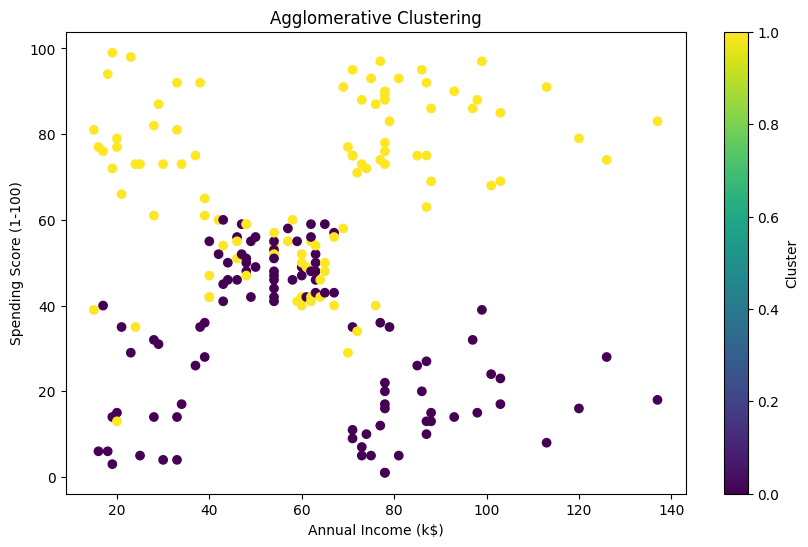

In [29]:
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo.fit(data_scaled)
data['Agglo_Cluster'] = agglo.labels_

# Plotting Agglomerative Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agglo_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [32]:
DATA = pd.read_csv('Mall_Customers.csv')    
DATA = DATA.drop(['CustomerID'],axis=1)
DATA = DATA.drop(['Genre'],axis=1)
DATA.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [33]:
# standardize the data
scaler = StandardScaler()
DATA_scaled = scaler.fit_transform(DATA)
DATA_scaled = pd.DataFrame(DATA_scaled, columns=DATA.columns)
DATA_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


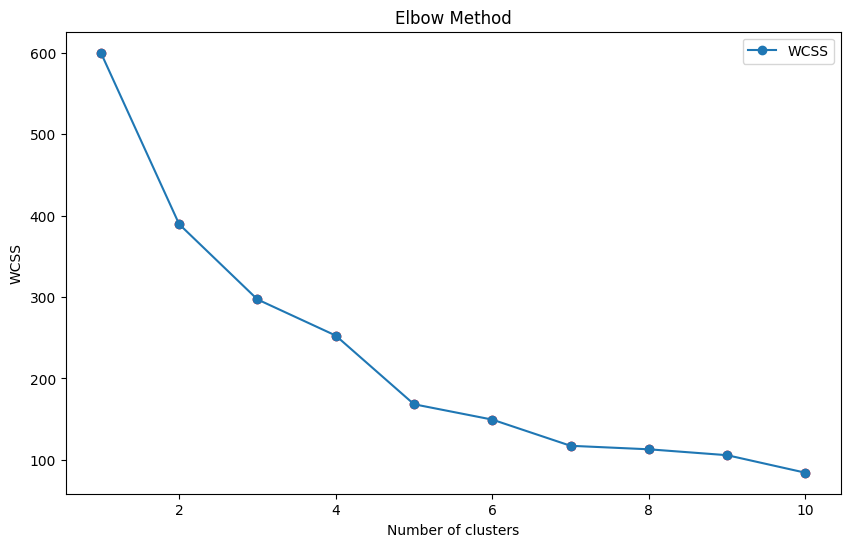

In [34]:
# using WCSS to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(DATA_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.scatter(range(1, 11), wcss, color='red')  # Add dots at each cluster
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

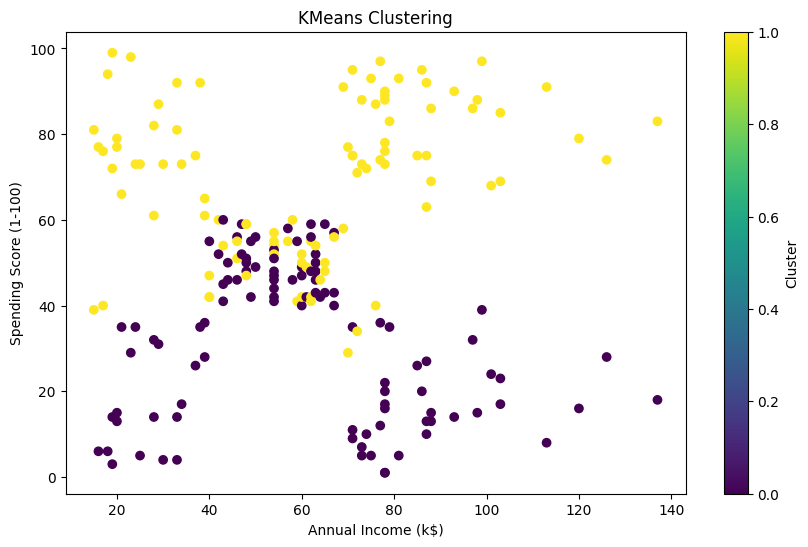

In [35]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(DATA_scaled)

data['KMeans_Cluster'] = kmeans.labels_
data.head()

# plotting KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

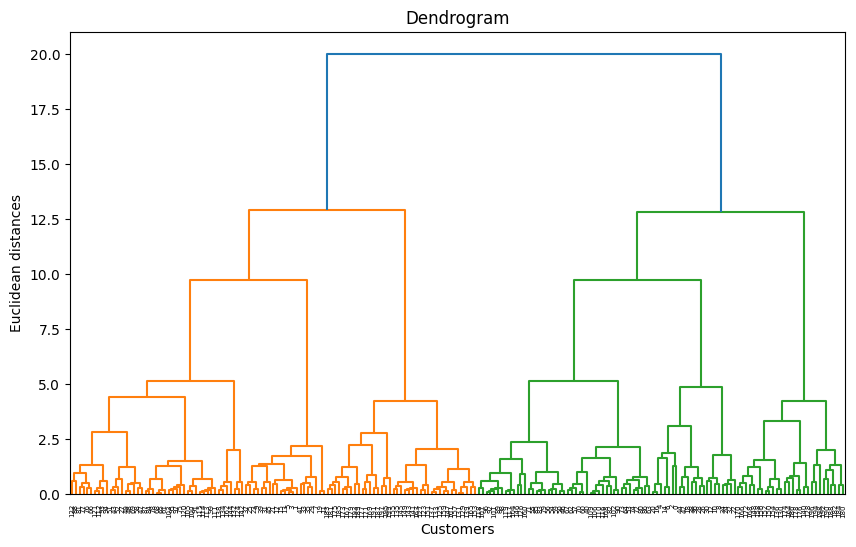

In [36]:
# Agglomerative clustering
 
link = linkage(DATA_scaled, method='ward')
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 6))
dendrogram(link, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

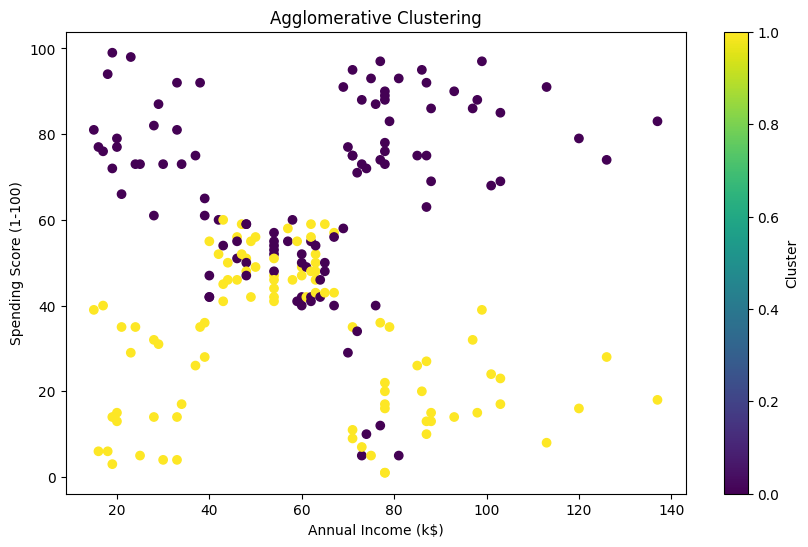

In [37]:
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo.fit(DATA_scaled)
data['Agglo_Cluster'] = agglo.labels_

# Plotting Agglomerative Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agglo_Cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

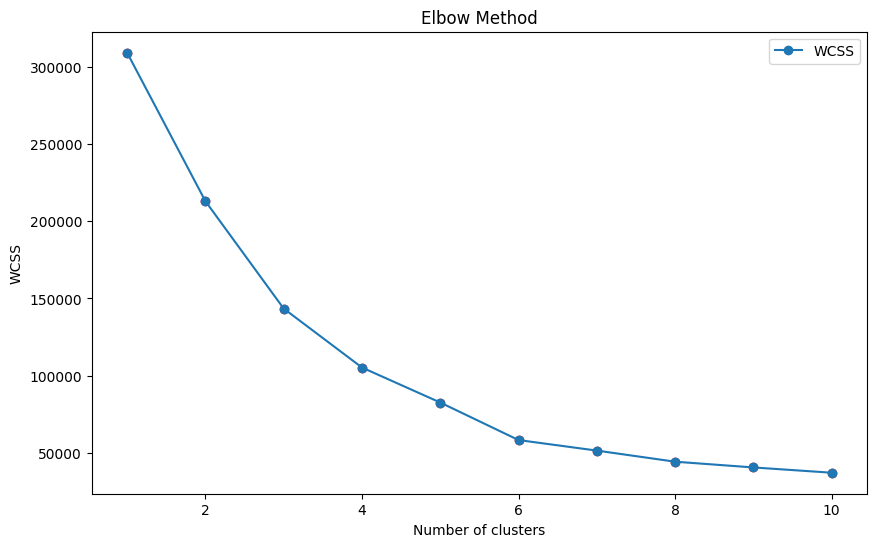

In [38]:
# using WCSS to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.scatter(range(1, 11), wcss, color='red')  # Add dots at each cluster
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

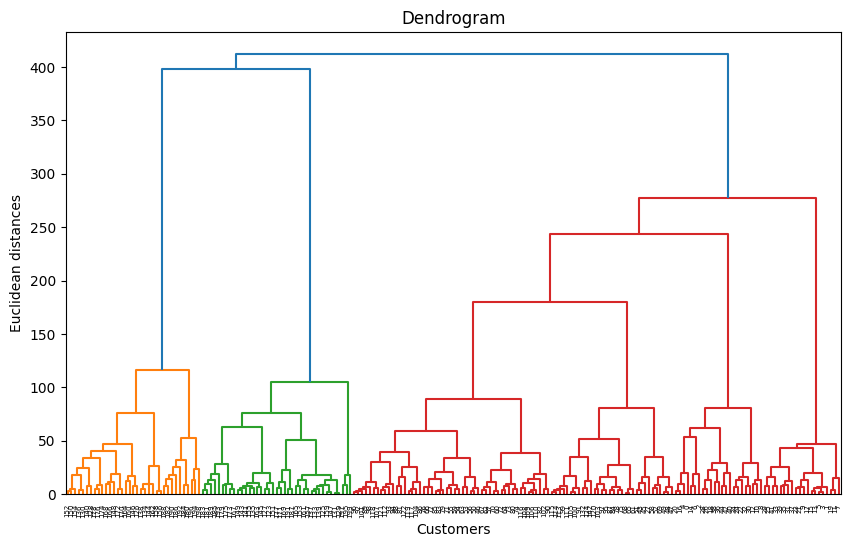

In [39]:
# Agglomerative clustering
 
link = linkage(data, method='ward')
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 6))
dendrogram(link, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()